In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Step 1: Load data
df = pd.read_csv(r"C:\Users\kotak\OneDrive\Documents\Ml_Project\mcdonalds.csv")
print(df.columns)
print(df.shape)
print(df.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
# Step 2: Convert first 11 columns to binary matrix (Yes -> 1, No -> 0)
MD_x = (df.iloc[:, 0:11] == "Yes").astype(int)

In [5]:
# Step 3: Column means
print(np.round(MD_x.mean(axis=0), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
# Step 4: PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

In [7]:
# Step 5: PCA summary (explained variance)
print("Explained Variance Ratio:", np.round(pca.explained_variance_ratio_, 3))
print("PCA Components:\n", np.round(pca.components_, 1))

Explained Variance Ratio: [0.299 0.193 0.133 0.083 0.059 0.05  0.044 0.04  0.037 0.032 0.029]
PCA Components:
 [[ 0.5  0.2  0.  -0.1 -0.3  0.1  0.3  0.5 -0.3  0.2 -0.4]
 [-0.4 -0.  -0.   0.   0.1  0.1  0.6 -0.3 -0.6 -0.1  0.1]
 [ 0.3  0.1  0.   0.3  0.8  0.1  0.1  0.3 -0.  -0.2  0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [ 0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.  -0.3  0.7]
 [-0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3  0.2  0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [-0.   0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.  -0.2  0.2]
 [-0.6  0.  -0.4  0.2  0.  -0.2 -0.1  0.6 -0.1  0.2  0.1]
 [ 0.1  0.7  0.1  0.  -0.  -0.2 -0.4 -0.1 -0.5  0.   0.3]
 [-0.   0.5 -0.1 -0.3 -0.  -0.3  0.5 -0.   0.5 -0.2  0. ]]


Text(0.5, 1.0, 'PCA Projection of McDonalds Dataset')

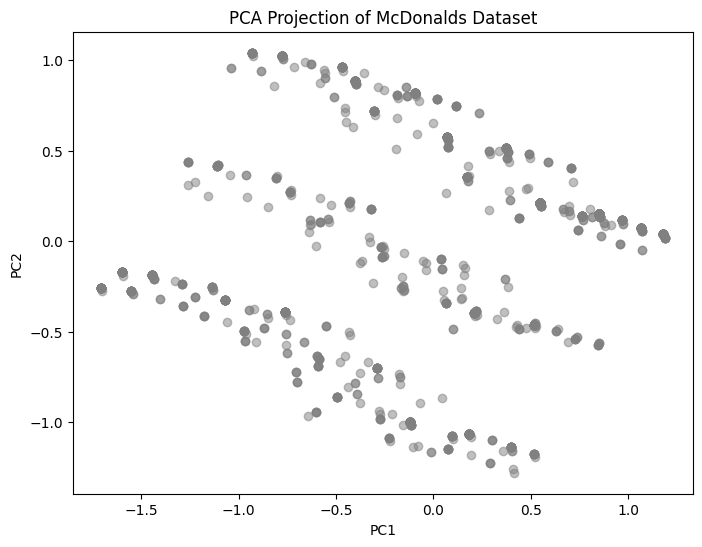

In [8]:
# Step 6: Plotting PCA projections
pca_scores = pca.transform(MD_x)
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of McDonalds Dataset')

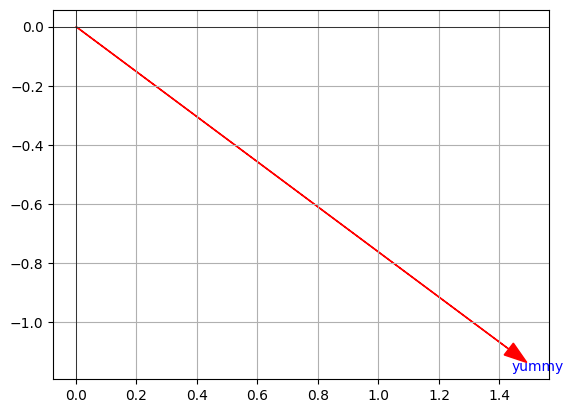

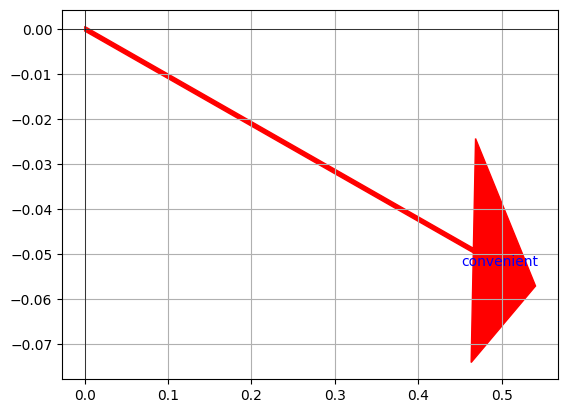

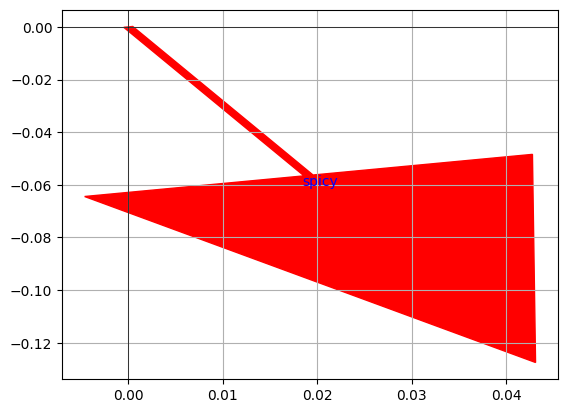

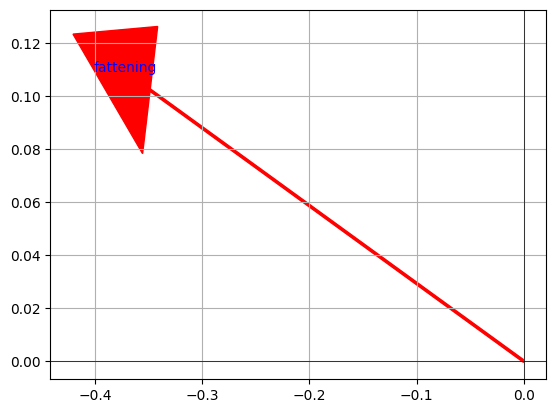

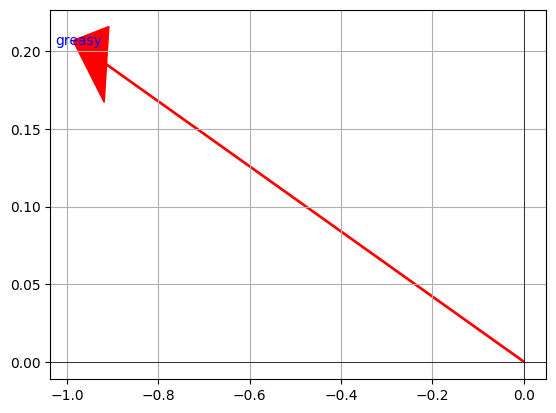

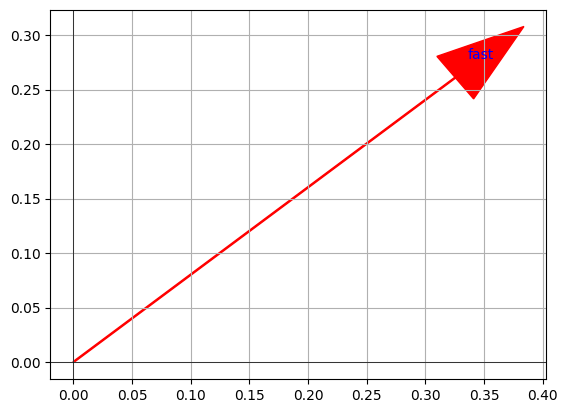

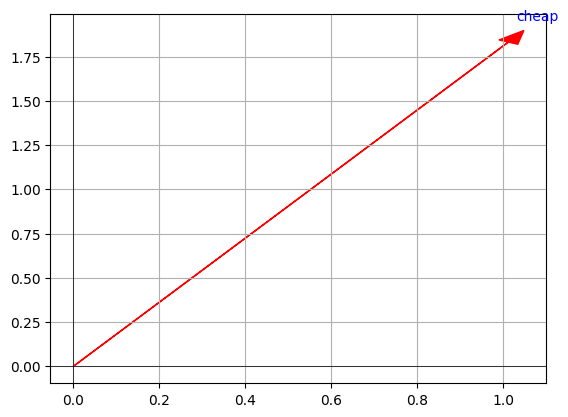

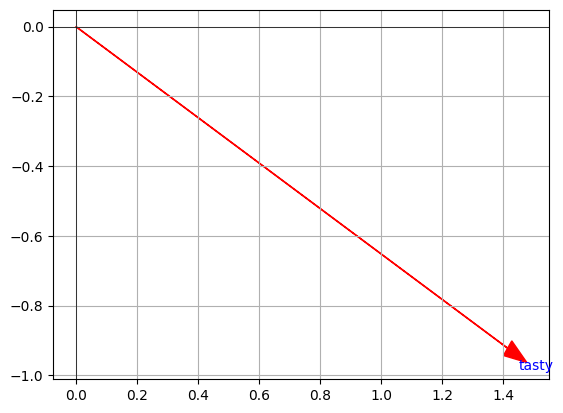

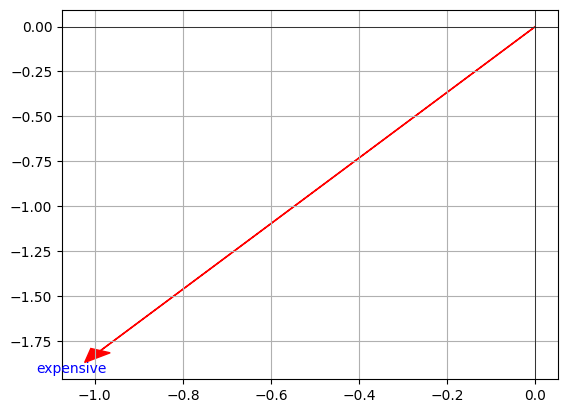

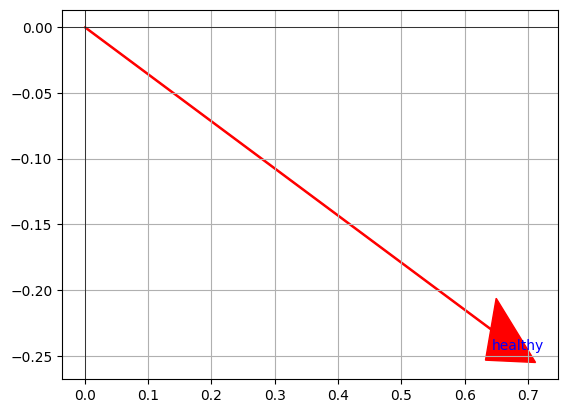

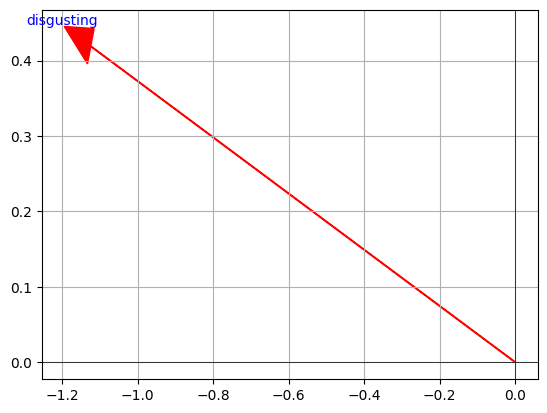

In [12]:
# Step 7: Plotting variable vectors (like projAxes)
for i, (x, y) in enumerate(pca.components_[:2].T):
    plt.arrow(0, 0, x * 3, y * 3, color='red', head_width=0.05)
    plt.text(x * 3.2, y * 3.2, df.columns[i], color='blue', ha='center')
    plt.grid(True)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()